## Goal
To develop further capability with numerical methods for integration.

We will also have a brief introduction to the idea of numerical
approximation of derivatives, as preparation for thinking about
ordinary and partial differential equations.

## Readings
Let us list all the sections we are covering in Newman Chapter 5 **Integrals and derivatives**, including those we read last week:

    5.1 Fundamental methods for evaluating integrals

    5.2 Errors on integrals

    5.3 Choosing the number of steps

    5.4 Romberg integration*

    5.5 Higher-order integration methods

    5.7 Choosing an integration method

    5.8 Integrals over infinite ranges*

    5.10 Derivatives* -- Just read subsections 5.10.1-5.10.3 for the basics.

\* New reading this week.


In [3]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Overview

There are two aspects to this week's investigations:

1.  The first is more technically oriented - we will reorient our thinking towards calculating results to a  given *tolerance*, rather than with a fixed number of steps.  We will then explore the idea of extrapolating to a more accurate answer - Romberg integration is an example of the more general approach of Richardson extrapolation, which is also applied in other contexts (in particular, solution of differential equations).

2. The second aspect is oriented towards developing savvy in the use of numerical integration.  We will develop a feel for some of the less well-behaved types of integrals which one encounters in practice, and see ways of handling integrals over infinite ranges.

This week you may use your own integration technique, or ```integrate.py``` to do this.  See some directions below the answer box for importing ```integrate.py```.  To use it, look at your work from last week, or call ```help(integrate)```.  To import the module, either you need a local copy of ```integrate.py``` in which case you can run:  

In [28]:
import integrate
import math

# benchmark function - as last week
def f_decay(x):
    return math.exp(-x)
int_decay = 1 - 1/math.e

# sample quick checks
#print(integrate.integrate(f_decay,(0,1),100)[0])           #trapezoid, 100 steps
#print(integrate.integrate(f_decay,(0,1),1000)[0])          #trapezoid, 100 steps
#print(integrate.integrate(f_decay,(0,1),100,order=2)[0])   #simpsons, 1000 steps

Or alternatively you can use the ```sys``` module (short for system) to update the filepaths that python will look for modules in.  The code for that is:  

In [81]:
import sys
sys.path.append("/Users/mcde2235/Box Sync/Coursework/PHY325/Spring2018/Labs/Lab4")
import integrate_2  


ModuleNotFoundError: No module named 'integrate_2'

**FYI: if you modify your module, you will need to restart the kernel to use the modified codes.  There are some alternative methods, but nothing elegant
[source](https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart).**

## Exercise 1: 

In Section 5.2.1, Newman describes the practical method for estimating the error in a trapezoidal rule or Simpson's rule calculation.  Try these error estimates out for the trapezoidal rule on our benchmark integral, with $20$ steps
and $200$ steps.  __How close are the estimates to the actual errors?__  What about the sign (this will matter when we get to Romberg integration)? Repeat for Simpson's rule.

In [24]:
help(integrate)


Help on module integrate:

NAME
    integrate

DESCRIPTION
    #Original Author Mark Caprio
    #University of Notre Dame
    #Spring 2014

FUNCTIONS
    integrate(f, interval, steps, order=1, float_type=<class 'float'>)
        Evaluate integral by Newton-Cotes rule (trapezoidal, Simpson's, etc.).
        
        f: function to integrate
        interval: tuple integration region (a,b)
        steps: number of integration steps (must be valid for order chosen)
        order (optional): integer order for integration (1..4)
        float_type: float type to which each term is converted before addition
        
        returns:
            total_integral (floating point number)
            x_array (1D np.array containing independent variable)
            I_array (1D np.array containing integrated values)

DATA
    endpoint_weights = [0.5, 0.3333333333333333, 0.375, 0.3111111111111111...
    interior_weights = [[1], [0.6666666666666666, 1.3333333333333333], [0....

FILE
    c:\users\chan

In [6]:
import numpy as np
N = 20
a = 0
b = 1


yexact=-np.exp(-1)+1
print(yexact)


def f(x): 
    '''calculates the y value of a quadtratic eqation. '''
    return np.e**-x

total_integral20, x_array20, I_array20= integrate.integrate( f,(a,b),N)


print("the integral for 20 steps is:",total_integral20)

difftrap= yexact-total_integral20
print( "difference between exact and trapezoid with 20 steps is:", difftrap)

N=200

total_integral200, x_array200, I_array200= integrate.integrate( f,(a,b),N)
print("the integral for 200 steps is:",total_integral200)

difftrap= yexact-total_integral200
print( "difference between exact and trapezoid with 200 steps is:", difftrap)



N=20
total_integral20, x_array20, I_array20= integrate.integrate( f,(a,b),N, order=2)


print("the integral for 20 steps is:",total_integral20)

difftrap= yexact-total_integral20
print( "difference between exact and simpson with 20 steps is:", difftrap)

N=200

total_integral200, x_array200, I_array200= integrate.integrate( f,(a,b),N, order=2)
print("the integral for 200 steps is:",total_integral200)

difftrap= yexact-total_integral200
print( "difference between exact and simpson with 200 steps is:", difftrap)




0.632120558829
the integral for 20 steps is: 0.632252245124816
difference between exact and trapezoid with 20 steps is: -0.000131686296258
the integral for 200 steps is: 0.6321218757458401
difference between exact and trapezoid with 200 steps is: -1.31691728245e-06
the integral for 20 steps is: 0.6321205807706576
difference between exact and simpson with 20 steps is: -2.19420999148e-08
the integral for 200 steps is: 0.6321205588307526
difference between exact and simpson with 200 steps is: -2.19491091968e-12


<div class=answer>
<div/>
N with 200 steps gives a smaller error than when we have 20 steps. The sign doesn't really matter because we are only looking at the difference between the analytical and approximate. 

## Exercise 2
### Trapezoidal rule with tolerance goal (Newman's Adaptive Method)

In practice, integration with a fixed  number of *steps* is not useful for automated use.  If your code must calculate millions of integrals (or even just hundreds of integrals), and you need a certain accuracy, it is simply impractical for you to intervene and hand-pick the number of steps for each integral.  You could just choose a "really big'' number of steps for all integrals, even when they are not needed, but this will make your code impractically slow (perhaps factors of hundreds slower than it needs to be).

Following the approach outlined in Newman Section 5.3, let us write a function which uses the trapezoidal rule to calculate with $1$, $2$, $4$, $8$, $\ldots$ steps (*i.e.*, $~2^i$ steps), until the error estimate falls below a specified tolerance.  

As Newman points out, we do not need to calculate all the points from scratch in each successive iteration.  Your
function should follow's Newman's approach, *i.e.*, "reusing'' the value of the previous integral to avoid evaluating the integrand $f$ at the same point more than once.

In fact, let us see how how much of an improvement this gives. Suppose we ultimately need, say, $2^{5}$ steps.  How many times would we have to evaluate $f$ if we evaluated the integral from scratch with each iteration ($1$, $2$, $4$, $8$, $\ldots$ steps)?  How many times would we have to evaluate $f$ if we reused the prior integrals, instead?

<div class=answer>
<div/>
we would need to do it 63 times the regular way and 31 times with newman's method. 

In [7]:
total=0
for n in range(5):
        total += 2**n
print(total)

31


Also, it will help if your function can produce verbose output, showing the integral and error estimate at each stage, and the residual relative to a known true value (you can peek at ```romberg.py``` for ideas on how to do this).

You can name your function ```integrate_adaptive```, and either embed it in this notebook in a code cell (as usual) or add it to the ```integrate.py``` which I gave you last week.   

In [12]:
tolerance= 10**-10
a=0
b=1

def integrate_adaptive(f,a,b,tolerance, verbose= False):
    """ evaluates an integral to a given tolerance
    f = function we are taking the integral of 
    a= begining bound of the integral
    b= end bound of integral"""
    
    if verbose == True:
        print("Using the adaptive trapezoid method on: ",f)
        print("over the interval: ",a,b)
        print("with a tolerance of: ", tolerance)
    
    error= 2*tolerance                 # makes sure that the error is bigger than tolerance so it can enter while loop
    N0 = 1                           #sets initial steps to 1
    I0 = (0.5*f(a) + 0.5*f(b))*(b-a)   # sets inital integral value, calculates trapezoid rule if only one step was used 
    iterations= 0
    while abs(error)>tolerance:
        iterations += 1
        if N0>(2**25):
            break
        
        N1 = 2*N0          #the new N value is 2x bigger than previous
        h1 = (b-a)/N1      #with new N value, H1 value is calculated
        I1 = 0             # variable holder so we can sum up odd terms in the integral
        
        if verbose == True:
            print ("h1 is",h1)
            print ("N1 is",N1)
        
        for k in range (1,(N1-1),2): 
                I1 += f(a+k*h1)         # adds up all of the odd terms in the integral to I1
        
        if verbose == True:
            print("I1 after for loop",I1)
        I1 = I1*h1                        # multiplies the sum of the odd terms by h1
        if verbose == True:
            print ("I1 after being multiplied by h1",I1)
        I1 += 0.5*I0                      # adds in .5 *I0 to I1
        if verbose == True:
            print ("I1 after addition of .5*I0",I1)
        error = (I1-I0)                  #calculates error
        if verbose == True:
            print ( "error is", error)           #prints what step number, new I1 and error is at end of each while loop
        I0 = I1                       # sets I1 of this loop as I0 for next loop
        N0 = N1                         # sets N1 of this loop as I0 for next loop
        
        
        if verbose == True:
            print("new NO is",N0)
            print("I0 is",I0)
    return I0, iterations, error
    
integrate=integrate_adaptive(f,a,b,tolerance,verbose= False )
int_decay = 1 - 1/math.e
print(integrate) 
#print (int_decay)

(0.63212040975812, 27, 1.381067317174356e-07)


Test your new function out on the same benchmark integral
$$
\int_0^1 e^{-x}\,dx
$$
as last week, and see how many iterations $i$ (and thus steps $2^i$) are
required to achieve a tolerance of $10^{-10}$.

In [ ]:

def f(x): 
    '''calculates the y value of a quadtratic eqation. '''
    return np.e**-x
integrate= integrate_adaptive(f,a,b,tolerance)

print (integrate)

integrate=integrate_adaptive(a,b,tolerance)
int_decay = 1 - 1/math.e
print(integrate) 
print (int_decay)

<div class=answer>
<div/>
I did not reach 10^-10 tolerance, the loop just kept running. I did get an answer of 0.63212040975812 which ran through 27 iterations with an error of 

## Exercise 3
### Romberg integration

In the interest of time, I have gone ahead and provided you with code for Romberg integration in ```romberg.py```.  It is basically just a straightforward extension of what you just coded for the trapezoidal rule.  (That is, as with most code, it is straightforward in *retrospect*, once it is written...)

First, try the function ```romberg.romberg``` on our benchmark integral.  Enable the verbose output (```verbose=True```), and provide the function with the true value (```reference=...```) so it can print the residual.  Let us try for a tolerance of $10^{-10}$ again.

In [37]:
import romberg

romberg= romberg.romberg(f,(a,b), tolerance, verbose= True, reference= int_decay)

print ("analytical answer is:", int_decay) 


integrating on range (0, 1)
  reference value +6.32121e-01

R(0,0) +6.839397205857212e-01 ... residual -5.1819e-02

R(1,0) +6.452351901491773e-01 epsilon(1,0) -1.2902e-02 ... residual -1.3115e-02
R(1,1) +6.323336800036626e-01 ... residual -2.1312e-04

R(2,0) +6.354094290276936e-01 epsilon(2,0) -3.2753e-03 ... residual -3.2889e-03
R(2,1) +6.321341753205323e-01 epsilon(2,1) -1.3300e-05 ... residual -1.3616e-05
R(2,2) +6.321208750083236e-01 ... residual -3.1618e-07

R(3,0) +6.329434182104802e-01 epsilon(3,0) -8.2200e-04 ... residual -8.2286e-04
R(3,1) +6.321214146047424e-01 epsilon(3,1) -8.5071e-07 ... residual -8.5578e-07
R(3,2) +6.321205638903564e-01 epsilon(3,2) -4.9384e-09 ... residual -5.0618e-09
R(3,3) +6.321205589519759e-01 ... residual -1.2342e-10

R(4,0) +6.323263138444998e-01 epsilon(4,0) -2.0570e-04 ... residual -2.0576e-04
R(4,1) +6.321206123891729e-01 epsilon(4,1) -5.3481e-08 ... residual -5.3561e-08
R(4,2) +6.321205589081349e-01 epsilon(4,2) -7.9083e-11 ... residual -7.9577e

How does the number of steps (and thus the number of points at which the integrand must be evaluated) compare to the number you needed before, with the trapezoidal rule?

<div class=answer>
<div/>
 Romberg went through 4 steps while ours had to max our at 27. Romberg is a lot more efficient because it uses less steps and had higher accuracy than the adaptive method

Here is an interesting observation, which I think might make Romberg extrapolation fit in better with what we have already seen.  We now seem to have two ways of going to higher order - the good old-fashioned way of using higher-order polynomials to go through the points (Newton-Cotes) or this new clever Romberg extrapolation way.
You might have noticed that:
1. the trapezoidal rule had an error of order $O(h^2)$, 

2. Simpson's rule  had an error of order $O(h^4)$, and now 

3. the first Romberg extrapolated value $R_{i,1}$ also has an error of order $O(h^4)$

    **Caution:** I am following the $0$-based convention that $R_{i,0}$ is the trapezoidal rule value, $R_{i,1}$ is the first extrapolation, *etc.*  Note that Newman uses $1$-based numbering, starting with $R_{i,1}$ for the trapezoidal rule, *etc.*, instead.

Might the first Romberg extrapolated value actually *be* Simpson'a rule???  Or does it just have an error which happens to be of the same order?  

More concretely...  Go ahead and do Simpson's rule calculations with $2^i$ steps, and compare with the first extrapolated values in the Romberg method.  Are they the same or different?  

In [42]:
n= [1,2,3,4]

for n in n:
    simp= integrate.integrate(f,(a,b), 2**n, order=2)[0]
    print(simp)

0.6323336800036626
0.6321341753205323
0.6321214146047422
0.6321206123891728


<div class=answer>
<div/>
They are very close to each other. 

Explain your result in terms of the
formulas for Simpson's rule, the trapezoidal rule, and Romberg
extrapolation.

<div class=answer>
<div/>
Answer here

## Exercise 4
### Life gets messy

** Note:** You may find your output in this section to be too much information.  You do not need to print out the entirety of the verbose output for all these
calculations.  

Now that we are equipped with all these ultrapowerful integration
algorithms, we should be ready to face any problem which is thrown at
us, right???  So calculating the area of a circle should be a piece of
cake, right?

*Ha! Since when has ```pi``` been cake?*

Plot the graph of the function $f(x)=\sqrt{1-x^2}$ on $[-1,1]$.

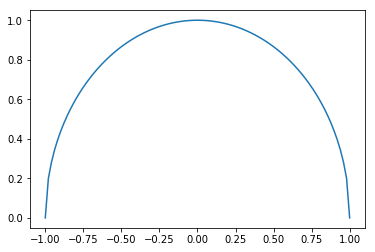

In [52]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

x=[]
y=[]
for t in np.linspace(-1,1,100):
    x.append(t)
    y.append(math.sqrt(1-t**2))
    
plt.plot(x,y)
plt.show()


What is the analytically known value of the integral
$$
\int_{-1}^{1}\sqrt{1-x^2}\,dx?
$$
**Note:** You may quote results from elementary school without further proof.

In [53]:
print (.5* math.pi*1**2)

1.5707963267948966


<div class=answer>
<div/>
see above cell


To reach a tolerence of $10^{-10}$ with the trapezoidal rule, how many
iterations (and thus steps) are required?  Do you find that the
residual of your 
calculated result, relative to the known true value, is consistent with the
tolerance you asked for?  How about with Romberg extrapolation?

In [ ]:
def fcircle (x):
    return math.sqrt(1-x**2)


romberg

<div class=answer>
<div/>
Answer here

Looking back at the
Euler-Maclaurin formula, why might we expect this integral to be
problematic?

**Comment:**  Our whole analysis is based on the idea that the error in the trapezoidal rule is $O(h^2)$.  But occasionally the coefficient on $h^2$ can be important...


<div class=answer>
<div/>
Answer here

There is a further lesson to be learned here.   Sometimes just throwing numerical methods at a problem is not enough.  A little forethought can allow us to
transform the problem into one which is more amenable to numerical solution.  Try
making the trigonometric substitution $x=\cos u$.

You should have just found that the integral an equivalent to
$\int_0^\pi \sin^2 u\,du$.  Do we still expect trouble?  (Explain.)  

<div class=answer>
<div/>
Answer here

How does this transformed integral fare with the Romberg method?

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

## Exercise 5
### Life continues to be messy: Oscillatory integrands

One perpetual bane of physicists' existence is highly oscillator
integrands.  

Let us look at the integral
$$
\int_0^{2\pi} e^x \sin 100x \,dx.
$$
First, plot the integrand.  Comment on why it might be problematic.
Can you speculate on how many slices might be needed for successful evaluation?

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

Then, see how Romberg fares on this integral.  Comment.

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

Now try the integral
$$
\int_0^{2\pi} e^x \sin 128x \,dx.
$$
See how Romberg fares on this integral, and comment on why.
Please attach your plot of the integrand.

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

In [ ]:
#plot here

## Exercise 6
### Integrals over infinite ranges

Let us start by reproducing Newmans's Example 5.3 (on page 180).  But please ignore Newman's code for Gaussian integration.  Instead, we will continue to use our own Romberg integration function.

Integrands which involve the Gaussian $e^{-x^2}$ show up throughout
physics.  The basic Gaussian integral has a simple known value, so we
will use it as our test case (as we used last week ):
$$
\int_{-\infty}^\infty e^{-x^2}\,dx=\sqrt{\pi}.
$$

The integrand is symmetric, so we are free to consider just one half
($\int_{0}^\infty e^{-x^2}\,dx$), as Newman uses for his example, then
double the result.  Let us transform this integral according
to (5.67), to make sure we see how Newman got his expression.

**Sorry about the
overloading of Gauss's name. A "Gaussian integral" is an integral of
the Gaussian function.  "Gaussian integration" is integration by Gaussian
quadrature.  The two are not particularly related.**

<div class=answer>
<div/>
Answer here

Now try to evaluate the transformed integral using the Romberg
method.  What problem do you encounter, and how can you fix it?
It will help to make a plot of the integrand.

**Hint:** From looking at the plot,  what is the integrand's limit as $z\rightarrow 1$?


In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

Finally, how does the Romberg method fare on the integral? Explain.

In [ ]:
#your code here

<div class=answer>
<div/>
Answer here

Plot your transformed integrand.

In [ ]:
#your code here

## Numerical differentiation

** Newman Exercise 5.15 **

Create a user-defined function ```f(x)``` that returns the value $1 + \frac{1}{2} \tanh(2x)$, then use a central difference to calculate the derivative of the function in the range $-2\le x\le2$.  Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot.  It may help to plot the exact answer as lines and the numerical one as dots.  

**Hint:** In Python the ```tanh``` function is found in the ```math``` package, and it's called simply ```tanh```.

Please attach your code and plots.


In [ ]:
#your code here